Loading and exploring our data set
This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

0 - red: many accidents
1 - green: few or no accidents
2 - yellow: in the middle

In [18]:
import pandas as pd
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [34]:
df.head()
#df.describe()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [20]:
# we deliberately decide this is going to be our label, it is often called lower case y
y=df['group']

In [21]:
y.head()

0    1
1    1
2    0
3    2
4    1
Name: group, dtype: int64

In [22]:
# since 'group' is now the label we want to predict, we need to remove it from the training data 
df.drop('group', axis='columns',inplace=True)

In [23]:
df.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


In [25]:
# input data often is named upper case X, the upper case indicates, that each row is a vector
X = df.to_numpy()

We restrict ourselves to two dimensions for now
Because this is all we really can visualize in 2d

In [31]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   size=(15, 8)):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=size)

    if clf:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)

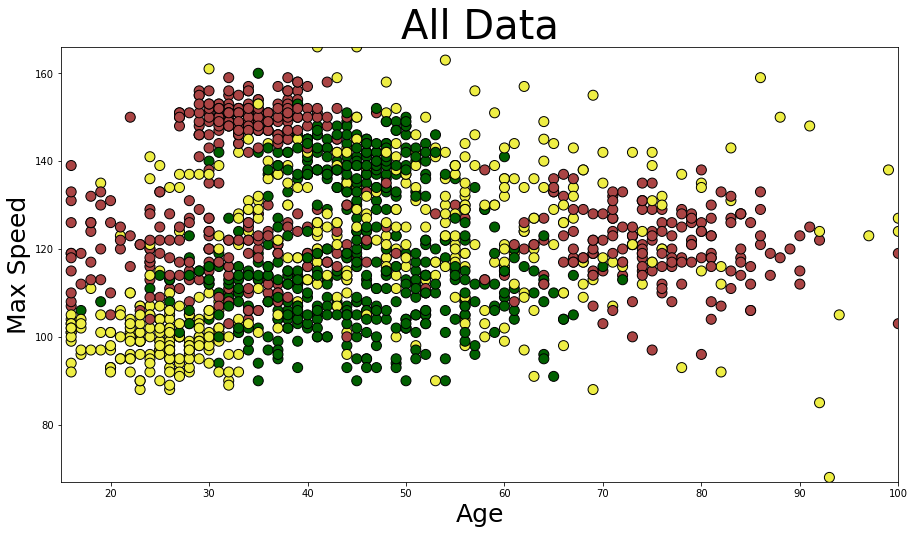

In [32]:
plotPrediction(None, X[:, 1], X[:, 0],'Age', 'Max Speed', y,title="All Data")

In [33]:
X[:, :2]

array([[ 98.,  44.],
       [118.,  54.],
       [111.,  26.],
       ...,
       [138.,  41.],
       [100.,  31.],
       [100.,  58.]])

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X[:, :2], y)  #time taken to be trained

Wall time: 12.5 ms


DecisionTreeClassifier()

In [37]:
input = [[100.0, 48.0]]
clf.predict(input) #inference
#predict label

array([1], dtype=int64)

# Second important concept: 
To have an idea how well the training worked, we save some data to test our model on previously unseen data.
The real objective is to have a generalized model that works well on the test data.
How well it performs on this test data as opposed to the training data tells us quite a bit as well.
Typical splits are 60% for training and 40% for testing or 80/20
It is important that we do not use the test data to tweak the hyper parameters of our learning strategy - in this case the test data would (indirectly) influence the training and can no longer tell how well we did
evaluate the test date set only once at the end of your experiment

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [39]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

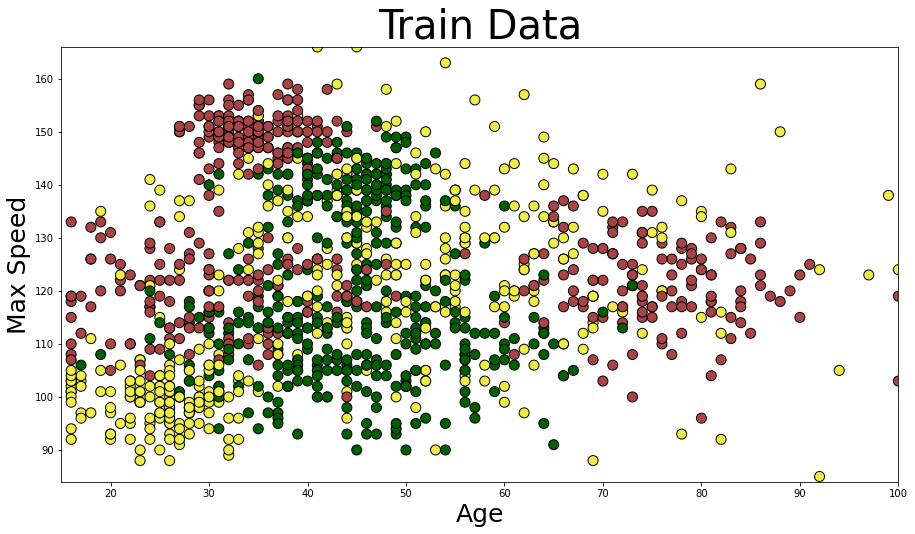

In [40]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, title="Train Data")

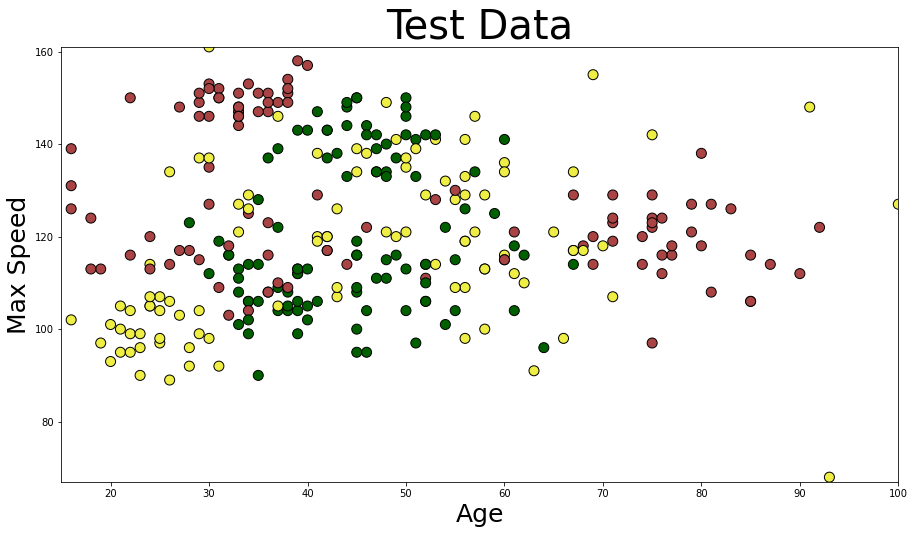

In [41]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, title="Test Data")

# What is the best split?
assign a category to each node containing a certain set of samples
use a metric (Gini or Entropy) to decide how good a node would be based on that category
sum up weighted metric for both child nodes
optimize the split for that summed metric

In [42]:
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 4.98 ms


DecisionTreeClassifier()

In [43]:
clf.tree_.max_depth

18

<ipython-input-31-a24244c4d5a5>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=cmap_light)


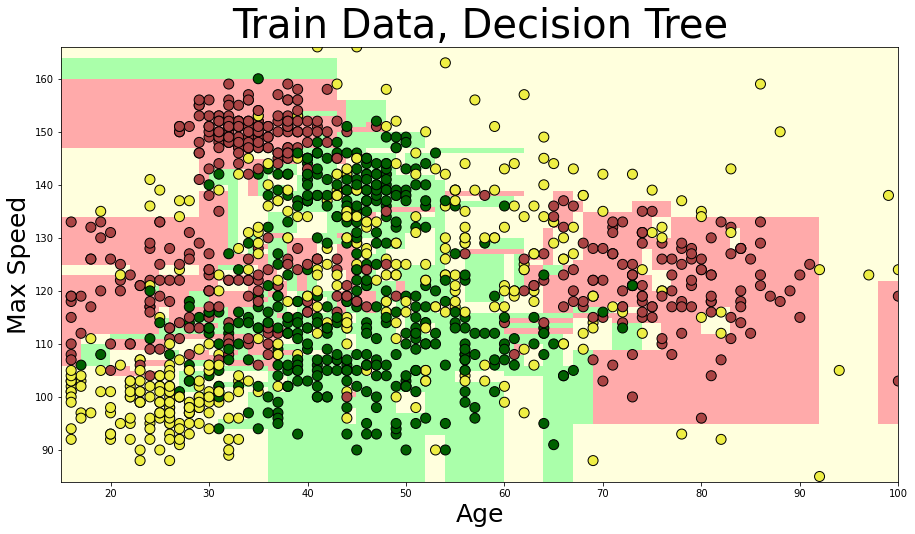

In [44]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree")

#boundry

In [45]:
clf.score(X_train_2_dim, y_train)
#accuracy

0.9425

<ipython-input-31-a24244c4d5a5>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=cmap_light)


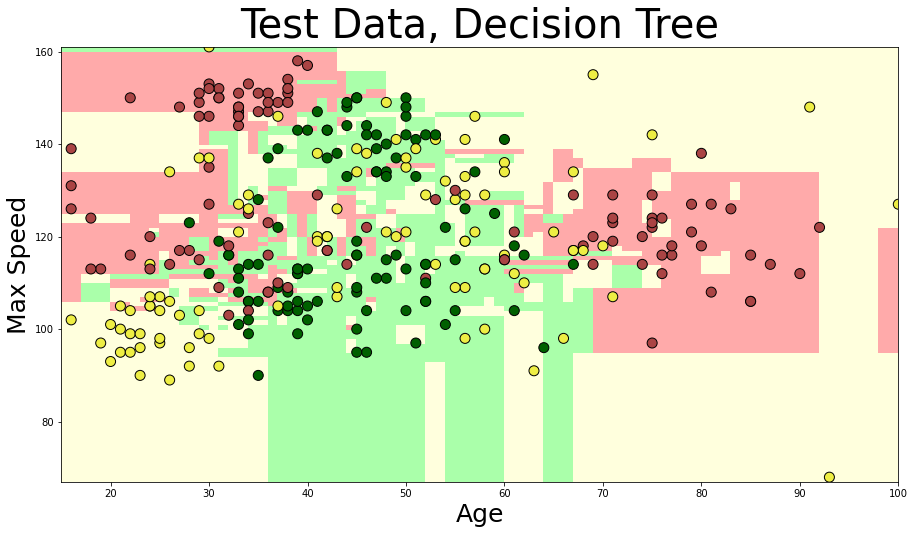

In [46]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree")

In [47]:
clf.score(X_test_2_dim, y_test)

0.61

In [52]:
# reduce overfitting -> simplify

clf = DecisionTreeClassifier(max_depth=10,
                              min_samples_leaf=3,
                              min_samples_split=2)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2.99 ms


DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)

In [49]:
clf.tree_.max_depth

10

<ipython-input-31-a24244c4d5a5>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=cmap_light)


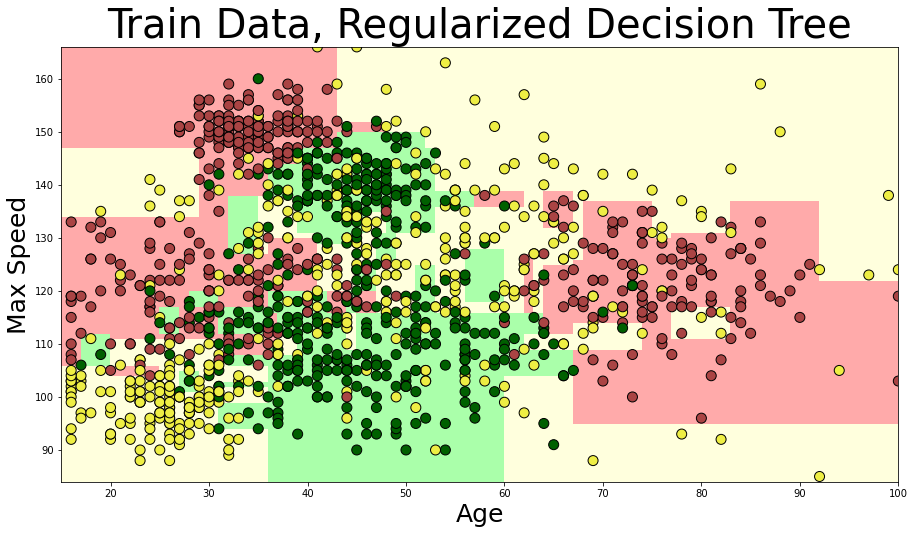

In [50]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree")

In [58]:
clf.score(X_train_2_dim, y_train)
#underfitting
#accuracy went down

0.8016666666666666

<ipython-input-31-a24244c4d5a5>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=cmap_light)


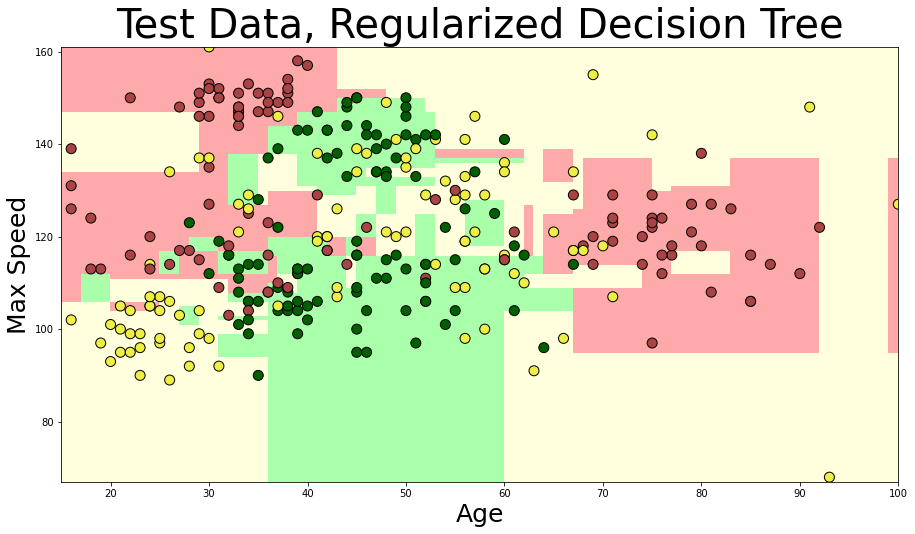

In [55]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree")

In [56]:
clf.score(X_test_2_dim, y_test)

0.6366666666666667

# Regularize the model

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:, :2], y, n_jobs=-1)
scores

array([0.62333333, 0.66666667, 0.67666667, 0.66666667, 0.70333333])

In [60]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.05)


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X[:, :2], y)
clf.best_params_

Wall time: 10.6 s


{'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [62]:
clf = DecisionTreeClassifier(max_depth=6,
                              min_samples_leaf=6,
                              min_samples_split=2)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2.78 ms


DecisionTreeClassifier(max_depth=6, min_samples_leaf=6)

In [63]:
clf.score(X_train_2_dim, y_train)

0.7233333333333334

In [64]:
clf.score(X_test_2_dim, y_test)

0.6566666666666666

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:, :2], y, n_jobs=-1)
scores

array([0.69      , 0.70666667, 0.66666667, 0.67      , 0.7       ])

In [66]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.03)


# Classification score


In [67]:
test_pred = clf.predict(X_test_2_dim)

In [70]:
from sklearn import metrics
metrics.accuracy_score(y_test,test_pred)

0.6566666666666666

In [73]:
metrics.confusion_matrix(y_test,test_pred)

array([[75, 18,  7],
       [10, 76, 14],
       [18, 36, 46]], dtype=int64)

In [77]:
metrics.precision_score(y_test,test_pred,average='macro')
#recall_score
#f1_Score

0.6664459628667715

In [79]:
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       100
           1       0.58      0.76      0.66       100
           2       0.69      0.46      0.55       100

    accuracy                           0.66       300
   macro avg       0.67      0.66      0.65       300
weighted avg       0.67      0.66      0.65       300

